## Install the dependencies

In [1]:
import numpy as np 
import pandas as pd 
import spacy
import matplotlib.pyplot as plt
!pip install spacytextblob
from spacytextblob.spacytextblob import SpacyTextBlob

In [2]:
df=pd.read_csv('../input/reddit-vaccine-myths/reddit_vm.csv')
df.head(20)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28
5,Canada: Oxford-AstraZeneca vaccine approval ex...,5,lftbji,https://www.canadaforums.ca/2021/02/canada-oxf...,0,1.612869e+09,NaN,2021-02-09 13:17:11
6,Comment,1,ej9x066,NaN,0,1.553474e+09,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53
7,Fuck you anti-vaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42
8,Comment,0,fofa0yy,NaN,0,1.587760e+09,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50
9,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21


# Data Preprocessing
### Remove the unrequired columns and drop columns with Null values 

In [3]:
df.drop(columns=['url','created','id'], inplace=True)
df.dropna(inplace=True)
df.head()

,title,score,comms_num,body,timestamp
6,Comment,1,0,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53
7,Fuck you anti-vaxxing retards,10,8,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42
8,Comment,0,0,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50
9,Comment,0,0,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21
10,Comment,1,0,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47


In [4]:
# Adding the nlp english language corpus
nlp = spacy.load('en_core_web_sm')

## Removal of hyperlinks
Regex is used to remove hyperlinks in the text body

In [5]:
#for index, row in df.iterrows():
#    print(row.body)
import re
df['body'] = df['body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

"""
for index, row in df.iterrows():
    text=row.body
    text_final = re.sub(r'\bhttps?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    row.body=text_final
    print(index,text_final)
    """

"\nfor index, row in df.iterrows():\n    text=row.body\n    text_final = re.sub(r'\x08https?:\\/\\/.*[\r\n]*', '', text, flags=re.MULTILINE)\n    row.body=text_final\n    print(index,text_final)\n    "

In [6]:
df.dropna()
df.head()

,title,score,comms_num,body,timestamp
6,Comment,1,0,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53
7,Fuck you anti-vaxxing retards,10,8,,2020-04-23 20:23:42
8,Comment,0,0,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50
9,Comment,0,0,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21
10,Comment,1,0,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47


# Perform sentiment analysis

In [7]:
# Adding spacy textblob
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

Remember, df.iterrows() returns a copy of the row over which it is iterated. Any changes made to the row will not be reflected in original dataframe. So, we need to refer to the row with the returned index during iteration.


https://stackoverflow.com/questions/25478528/updating-value-in-iterrow-for-pandas

In [8]:

# print(nlp.pipe_names)
for index, row in df.iterrows():
    text = row.body
    doc = nlp(text)
    subjectivity=doc._.sentiment.subjectivity
    polarity= doc._.sentiment.polarity
    print(text)
    print("\nsubjectivity:", subjectivity)
    print("polarity:",polarity)
    print("------------------------")
    df.loc[index, 'Polarity'] = polarity
    df.loc[index,'Subjectivity']=subjectivity
   

Your OP. It's not a myth. Only one vaccine contains it and you can get it without it. So your OP is pointless flex. 

subjectivity: 0.75
polarity: -0.125
------------------------


subjectivity: 0.0
polarity: 0.0
------------------------
Because Anti-Vaxxers have no sense

subjectivity: 0.0
polarity: 0.0
------------------------
What do you mean by "your OP". I am fairly new to reddit.

subjectivity: 0.5710227272727273
polarity: -0.08806818181818182
------------------------
When they say there's no thimerasol, they mean in the childhood schedule. That IS a fact. 

subjectivity: 0.6875
polarity: -0.3125
------------------------
The "myth" you're debunking is in regards to the childhood schedule. ZERO OF THOSE VACCINES CONTAIN IT.  You're being a pedantic fuck for no reason. 

subjectivity: 0.6
polarity: -0.4
------------------------
You'll have to read it again because I didn't say that, the CDC did. You say one flu vaccine but the CDC says multiple. Check the CDC link. To paraphrase, "

In [9]:
df.tail()

,title,score,comms_num,body,timestamp,Polarity,Subjectivity
1424,Comment,1,0,"I sure am, which is how I know there is mercur...",2019-03-25 06:06:26,0.275000,0.722222
1425,Comment,2,0,I've been studying and debating vaccine safety...,2019-03-25 06:03:08,-0.262500,0.512500
1426,Comment,3,0,They don't contain mercury. Compounds are not ...,2019-03-25 06:02:25,-0.500000,0.900000
1427,Comment,3,0,Nope. I didn't say anything about childhood va...,2019-03-25 05:54:10,-0.214286,0.357143
1428,Comment,1,0,I didn't say thimerosal is mercury. I said thi...,2019-03-25 05:50:41,0.425000,0.875000


In [10]:
# Finding the no. of rows and columns
df.shape

(1064, 7)

In [11]:
# Extracting a part of the main dataframe for analysis
df2=df.iloc[:,3:7]
df2.tail()

,body,timestamp,Polarity,Subjectivity
1424,"I sure am, which is how I know there is mercur...",2019-03-25 06:06:26,0.275000,0.722222
1425,I've been studying and debating vaccine safety...,2019-03-25 06:03:08,-0.262500,0.512500
1426,They don't contain mercury. Compounds are not ...,2019-03-25 06:02:25,-0.500000,0.900000
1427,Nope. I didn't say anything about childhood va...,2019-03-25 05:54:10,-0.214286,0.357143
1428,I didn't say thimerosal is mercury. I said thi...,2019-03-25 05:50:41,0.425000,0.875000


## Visualising polarity vs subjectivity using Seaborn
Polarity indicates the how positive or negative is the sentecne. It is a float value lying between [-1,1].
Subjectivity refers to the extent of information it has. It may be factual information.
E.g., The sun rises in the east is a subjective sentence

https://www.geeksforgeeks.org/seaborn-color-palette/ _for seaborn color palette

In [12]:
text1='Earths mechanically rigid outer layer, the lithosphere, is divided into tectonic plates. These plates are rigid segments that move relative to each other at one of three boundaries types: at convergent boundaries, two plates come together; at divergent boundaries, two plates are pulled apart; and at transform boundaries, two plates slide past one another laterally. Along these plate boundaries, earthquakes, volcanic activity, mountain-building, and oceanic trench formation can occur.[115] The tectonic plates ride on top of the asthenosphere, the solid but less-viscous part of the upper mantle that can flow and move along with the plates'
doc = nlp(text1)
subjectivity=doc._.sentiment.subjectivity
polarity= doc._.sentiment.polarity
print("Subjectivity:",subjectivity,"\nPolarity:",polarity)

Subjectivity: 0.2041666666666667 
Polarity: 0.020833333333333332


From the visualisations we know that much of the data points (involving polarity) are concentrated near zero.That means more of the tweets are neural in nature.


Conversion from string to date

Conversion from string to date is many times needed while working with imported data sets from a csv or when we take inputs from website forms. To do this, python provides a method called strptime().

Syntax:

datetime.strptime(string, format)
Parameters:

string – The input string.
format – This is of string type. i.e. the directives can be embedded in the format string.

Source: https://www.geeksforgeeks.org/formatting-dates-in-python/

### How to fix labels in seaborn visuals
https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

### How to drop rows in pandas
https://stackoverflow.com/questions/28876243/how-to-delete-the-current-row-in-pandas-dataframe-during-df-iterrows

In [13]:
# Iterating over the rows of new dataframe df2
for index, row in df2.iterrows():
    #print(row.timestamp[0:4])
    df2.loc[index, 'Year'] = row.timestamp[0:4] # Find the year
    df2.loc[index,'Month']=row.timestamp[5:7] # Find the month
df2.head()

,body,timestamp,Polarity,Subjectivity,Year,Month
6,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53,-0.125000,0.750000,2019,03
7,,2020-04-23 20:23:42,0.000000,0.000000,2020,04
8,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50,0.000000,0.000000,2020,04
9,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21,-0.088068,0.571023,2019,03
10,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47,-0.312500,0.687500,2019,03


In [14]:
df2.shape

(1064, 6)

## Removing the cases where polarity and subjectivity are irrelevant

In [15]:
# To remove the cases where subjectivity and polarity are both 0.000
# Creating a new dataframe d4 (copy of d2)
df4=df2.copy()
c=0;
for index, row in df4.iterrows():
    if(row.Polarity==0.00 and row.Subjectivity==0.00):
        c+=1
        
print("No. of irrelevant values:",c)

No. of irrelevant values: 259


In [16]:
for index, row in df4.iterrows():
    if(row.Polarity==0.00 and row.Subjectivity==0):
        df4.drop(index, inplace=True)
df4.head()

,body,timestamp,Polarity,Subjectivity,Year,Month
6,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53,-0.125000,0.750000,2019,03
9,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21,-0.088068,0.571023,2019,03
10,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47,-0.312500,0.687500,2019,03
11,"The ""myth"" you're debunking is in regards to t...",2019-03-25 05:50:20,-0.400000,0.600000,2019,03
12,You'll have to read it again because I didn't ...,2019-03-25 05:40:03,0.285714,0.342857,2019,03


In [17]:
df4.shape
# It shows the total no. of available datapoints

(805, 6)

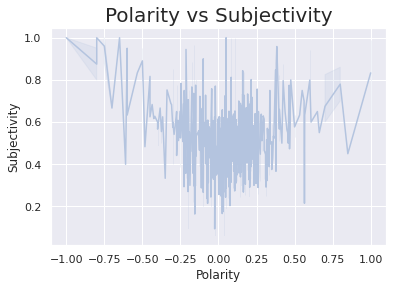

In [18]:
import seaborn as sns
sns.set_theme(style="darkgrid") # Set a theme
sns.set_palette("PuBu",2) # Color, intensity
sns.lineplot(x="Polarity", y="Subjectivity",data=df4) 
plt.title("Polarity vs Subjectivity", size=20)
plt.show()

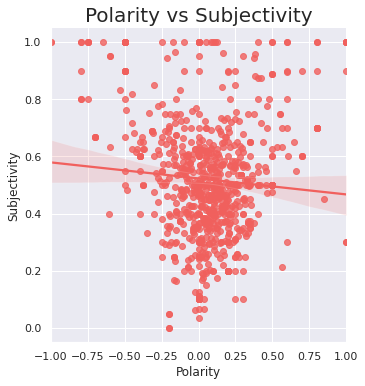

In [19]:
sns.set_palette("magma_r",2) # Color, intensity
sns.lmplot(x="Polarity", y="Subjectivity",data=df4)
plt.title("Polarity vs Subjectivity", size=20)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 6 to 1428
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         805 non-null    float64
 1   Subjectivity  805 non-null    float64
 2   Polarity      805 non-null    float64
dtypes: float64(3)
memory usage: 25.2 KB


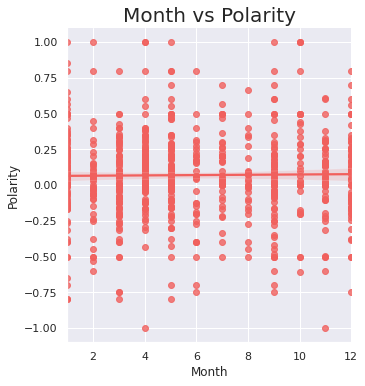

In [20]:
# Creating a new dataframe to store polarity and month 
df5=df4[['Polarity','Subjectivity','Month']]
df5=df4[['Month','Subjectivity','Polarity']].astype('float64')
df5.info()
fig=sns.lmplot(x='Month',y='Polarity',data=df5)
plt.title("Month vs Polarity", size=20)
plt.show()

Here, we see that majority of tweets are neutral for each month and the polarity lies around zero (between -0.25 and 0.25) From this we know that Myths revolving around the vaccines are relatively neutral.

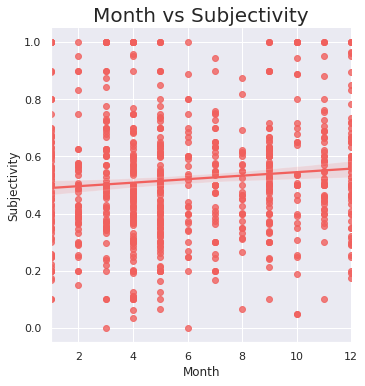

In [21]:
fig=sns.lmplot(x='Month',y='Subjectivity',data=df5)
plt.title("Month vs Subjectivity", size=20)
plt.show()

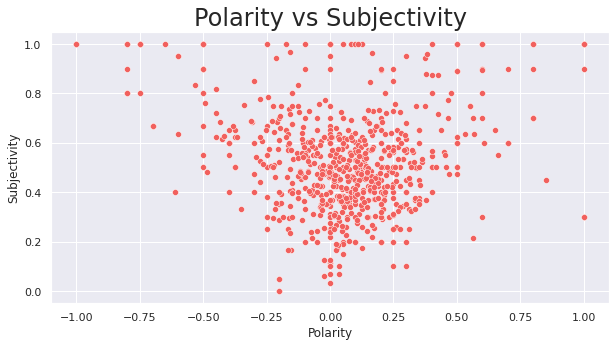

In [22]:
fig, ax = plt.subplots(figsize = ( 10,5 ))
sns.scatterplot(ax=ax, x='Polarity', y='Subjectivity', data=df5)
ax.set_xlabel( "Polarity" , size = 12 )
ax.set_ylabel( "Subjectivity" , size = 12 )
ax.set_title( "Polarity vs Subjectivity" , size = 24)
plt.show()